In [37]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from get_initial_parameters2 import get_initial_parameters
from modeling2 import model
from plot_trajectory2 import plot_trajectory
from scipy import interpolate
from scipy.optimize import minimize
from read_data import read_data

In [38]:
# file_id = '2025-10-19-21-50-17'
# file_id = '2025-10-19-21-50-22'
# file_id = '2025-10-19-21-50-28'
# file_id = '2025-10-19-21-50-33'
file_id = '2025-10-19-21-50-39'
# file_id = '2025-10-19-21-50-45'

In [39]:
time, frame_num, x_raw, y_raw = read_data(file_id)

In [40]:
def objective(params, args):
    wx0, wy0, oil_length = params[0], params[1], params[2]
    time, x_raw, y_raw = args[0], args[1], args[2]
    x0, y0, u0, v0, mu, c = get_initial_parameters(time, x_raw, y_raw, oil_length)

    t, x, y, u, v, wx, wy, wz = model(x0, y0, u0, v0, wx0, wy0, 0, mu, 0.25, oil_length)

    interp_x = interpolate.interp1d(t, x, kind='cubic',
                                         bounds_error=False, fill_value='extrapolate')
    interp_y = interpolate.interp1d(t, y, kind='cubic',
                                         bounds_error=False, fill_value='extrapolate')

    x_at_time = interp_x(time)
    y_at_time = interp_y(time)

    lane_length = 18.288
    lane_width = 1.054

    error = np.sum((x_at_time - x_raw)**2 / lane_width**2 + (y_at_time - y_raw)**2 / lane_length**2)
    # error = np.sum((x_at_time - x_raw)**2 + (y_at_time - y_raw)**2)
    return error

initial_guess = [-5, -20, 12.5]
bnds = ((-20, 20), (-40, 0), (10,15))
args = [time, x_raw, y_raw]
result = minimize(objective, initial_guess, args=args, method='Nelder-Mead', bounds=bnds)

print(f"Optimal parameters: {result.x}")

Optimal parameters: [-10.66296274 -17.58297225  12.6271553 ]


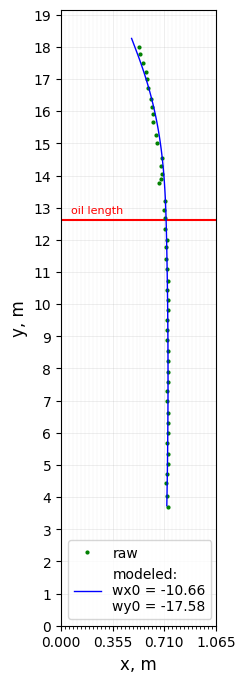

In [41]:
wx0_opt, wy0_opt, oil_length_opt = result.x[0], result.x[1], result.x[2]
x0, y0, u0, v0, mu, c = get_initial_parameters(time, x_raw, y_raw, oil_length_opt)
t_opt, x_opt, y_opt, u_opt, v_opt, wx_opt, wy_opt, wz_opt = model(x0, y0, u0, v0, wx0_opt, wy0_opt, 0, mu, 0.25, oil_length_opt)
plot_trajectory(x_opt, y_opt, x_raw, y_raw, f"modeled:\nwx0 = {wx0_opt:.2f}\nwy0 = {wy0_opt:.2f}", oil_length_opt)